In [ ]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [ ]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) =fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


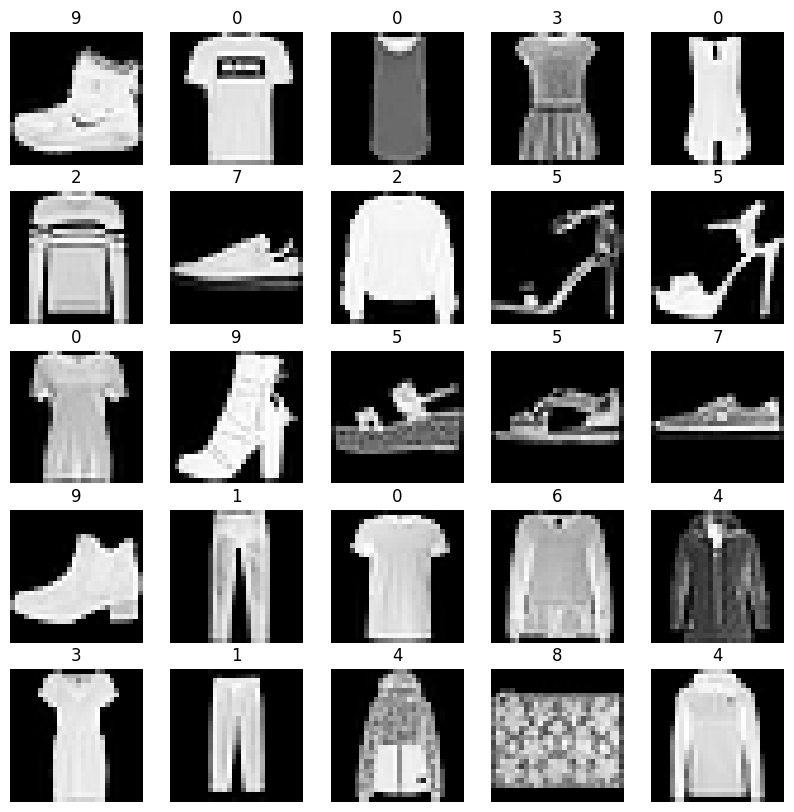

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='Greys_r')
    plt.title(train_labels[i])
    plt.axis('off')
    
plt.show()

In [ ]:
train_images = train_images.reshape((60000, -1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, -1))
test_images = test_images.astype('float32') / 255


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model

l=10
encoding_dim = l*l  
image_size = train_images.shape[1]
inputs = layers.Input(shape=(image_size,), name = 'input_image')
encoded = layers.Dense(encoding_dim,
                       activation='relu',
                       name = 'encoded')(inputs) 
output_image = layers.Dense(image_size, 
                            activation='sigmoid',
                            name = 'reconstructed')(encoded)
model = Model(inputs=inputs, outputs=output_image)
model.compile(optimizer='adam',
              loss='mean_squared_error')
model.fit(train_images,
          train_images,
          epochs=20,
          batch_size=64)

Epoch 1/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0272
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0116
Epoch 3/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0094
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0084
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0078
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0074
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0071
Epoch 8/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0070
Epoch 9/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0069
Epoch 10/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0068
Epoch 11/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0067
Epoch 12/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0067
Epoch 13/20
938/938 [====

1/1 [==============================] - 0s 37ms/step


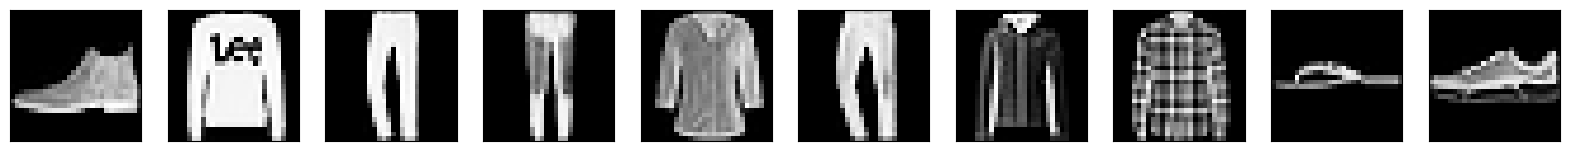

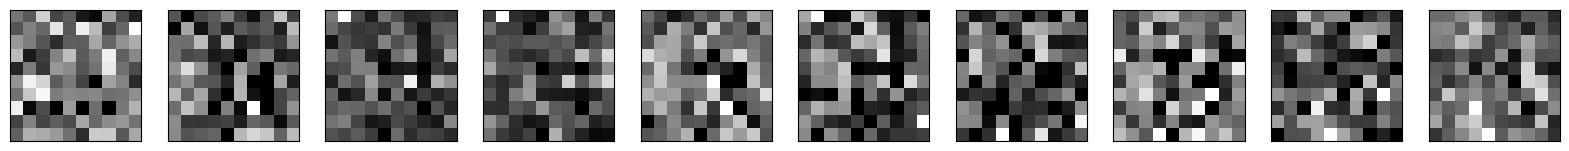

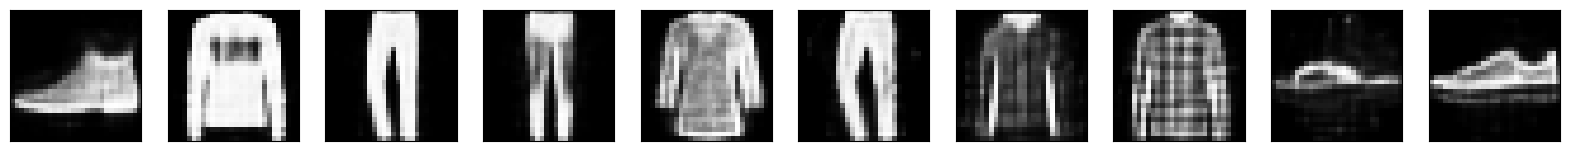

In [ ]:
fig, axes1 = plt.subplots(nrows=1,
                         ncols=10,
                         sharex=True,
                         sharey=True,
                         figsize=(20,5))
fig, axes2 = plt.subplots(nrows=1,
                         ncols=10,
                         sharex=True,
                         sharey=True,
                         figsize=(20,5))
fig, axes3 = plt.subplots(nrows=1,
                         ncols=10,
                         sharex=True,
                         sharey=True,
                         figsize=(20,5))

in_imgs = test_images[:10]

reconstructed = model.predict(in_imgs)

layer_output=model.get_layer('encoded').output  #get the Output of the Layer
intermediate_model=tf.keras.models.Model(inputs=model.input,outputs=layer_output) #Intermediate model between Input Layer and Output Layer which we are concerned about
intermediate_prediction=intermediate_model.predict(in_imgs) #predicting in the Intermediate Node


for img, ax in zip(in_imgs, axes1):
    ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

for img, ax in zip(intermediate_prediction, axes2):
    ax.imshow(img.reshape((l,l)), cmap='Greys_r')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

for img, ax in zip(reconstructed, axes3):
    ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

